In [ ]:
import sys
from pathlib import Path
sys.path.append(str(Path.cwd().parent / "src"))

import random

from config import PROCESSED_TANGRAMS_WHITE, MAPPING_FILE, OUTPUT_DIR
import embedding
import similarity
from PIL import Image
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
from config import OUTPUT_DIR  # or whatever your output directory is called
print(OUTPUT_DIR.exists())
print(list(OUTPUT_DIR.iterdir()))

True
[PosixPath('/Users/mankewitz/Projects/comp-cog/comp-shapes-comm/stimuli/generate_tangrams/outputs/checkpoints'), PosixPath('/Users/mankewitz/Projects/comp-cog/comp-shapes-comm/stimuli/generate_tangrams/outputs/similarity_results')]


Test new pretrained clip model

In [3]:
repo_id = "lil-lab/kilogram-models"
filenames = ["clip_controlled/whole+black/model0.pth",
             "clip_controlled/whole+black/model1.pth",
             "clip_controlled/whole+black/model2.pth"]  # Add all your .pth filenames here

In [8]:
model, processor, device = embedding.setup_pretrained_model(repo_id, filenames, None)

/Users/mankewitz/Projects/comp-cog/comp-shapes-comm/stimuli/generate_tangrams/src/embedding.py:20: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model_parts = [torch.load(pt

In [10]:
test_image = PROCESSED_TANGRAMS_WHITE / "0_0.png"

In [13]:
input_image = processor(test_image)
model_output = model(input_image)
model_output_forward = model.forward(input_image)

Test new embedding extractor

In [8]:
# For debugging
model_name = "google/siglip-so400m-patch14-384"
model, processor, device = embedding.setup_pretrained_model(repo_id,filenames,  device = None)

# Look at what we're working with
print("Model type:", type(model))
print("Model attributes:", dir(model))

# Test with one image
test_image = PROCESSED_TANGRAMS_WHITE / "0_1.png"
inputs = processor(test_image)
print(inputs.shape)

Model type: <class 'embedding.FTCLIP'>
Model attributes: ['T_destination', '__annotations__', '__call__', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattr__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setstate__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_apply', '_backward_hooks', '_backward_pre_hooks', '_buffers', '_call_impl', '_compiled_call_impl', '_device', '_forward_hooks', '_forward_hooks_always_called', '_forward_hooks_with_kwargs', '_forward_pre_hooks', '_forward_pre_hooks_with_kwargs', '_get_backward_hooks', '_get_backward_pre_hooks', '_get_name', '_is_full_backward_hook', '_load_from_state_dict', '_load_state_dict_post_hooks', '_load_state_dict_pre_hooks', '_maybe_warn_non_full_backward_hook', '_modules', '_named_members', '_non_persis

Found 11 sets with max similarity > 0.1

Set 8 (max similarity: 0.847)


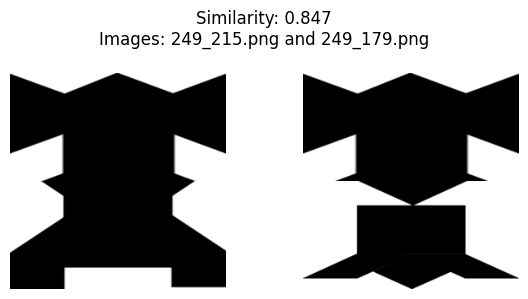


Set 1 (max similarity: 0.827)


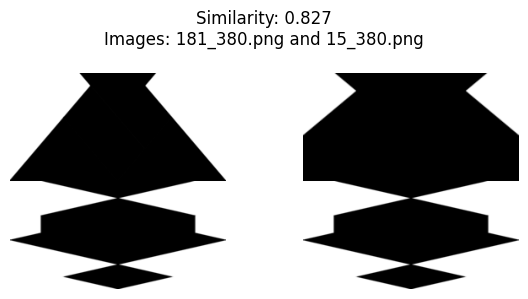


Set 4 (max similarity: 0.819)


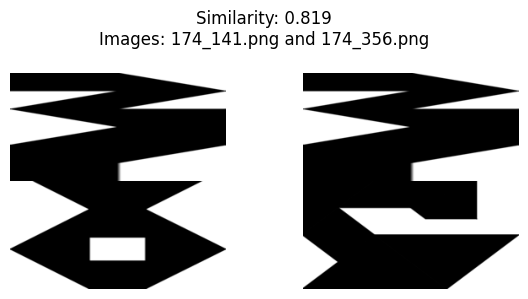


Set 0 (max similarity: 0.812)


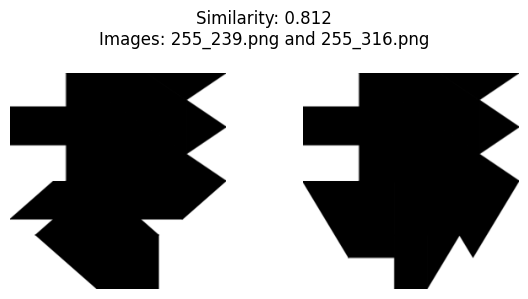


Set 6 (max similarity: 0.793)


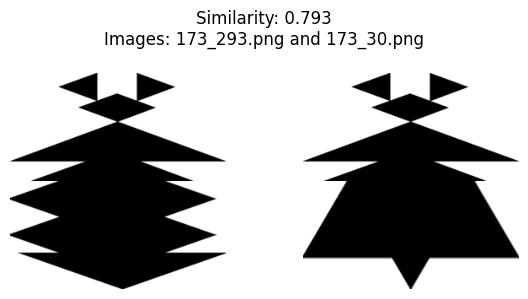


Set 10 (max similarity: 0.770)


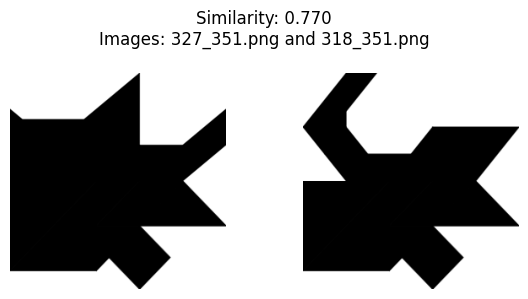


Set 2 (max similarity: 0.764)


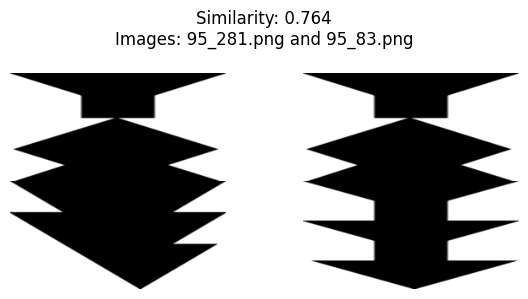


Set 3 (max similarity: 0.734)


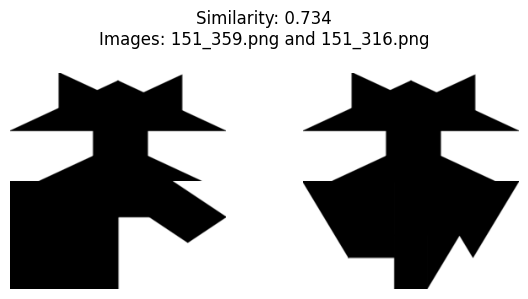


Set 5 (max similarity: 0.723)


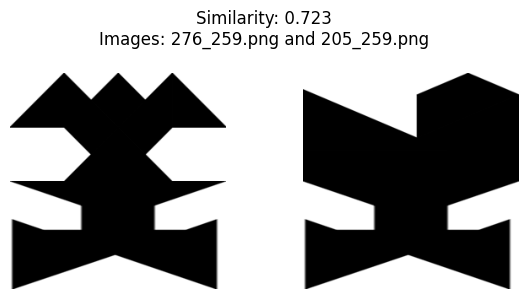


Set 7 (max similarity: 0.709)


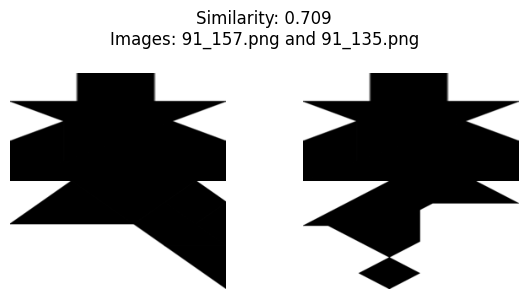


Set 9 (max similarity: 0.687)


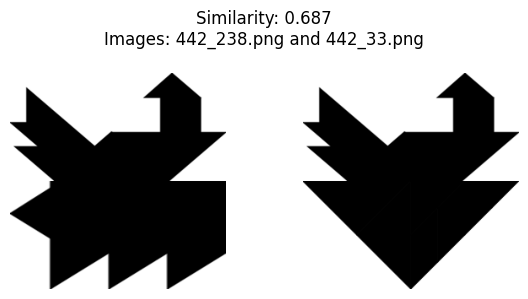

In [13]:
# Find sets with high similarities
high_sim_sets = []
threshold = 0.1  # or whatever threshold you want

# Find and sort high similarity sets
for set_id, image_set in pretrained_manager.sets.items():
    stats = image_set.get_summary_stats()
    if stats['max_similarity'] > threshold:
        high_sim_sets.append((set_id, stats['max_similarity']))

high_sim_sets.sort(key=lambda x: x[1], reverse=True)

print(f"Found {len(high_sim_sets)} sets with max similarity > {threshold}")

# Look at each set's most similar pairs
for set_id, max_sim in high_sim_sets:
    print(f"\nSet {set_id} (max similarity: {max_sim:.3f})")
    pretrained_manager.sets[set_id].display_ranked_pairs(n_pairs=1)

In [37]:
max_similarities = [
        manager_noncomp.sets[set_id].get_summary_stats()['max_similarity'] 
        for set_id in manager_noncomp.sets
    ]

mean_similarities = [
        manager_noncomp.sets[set_id].get_summary_stats()['mean_similarity'] 
        for set_id in manager_noncomp.sets
    ]

In [38]:
len(mean_similarities)

300

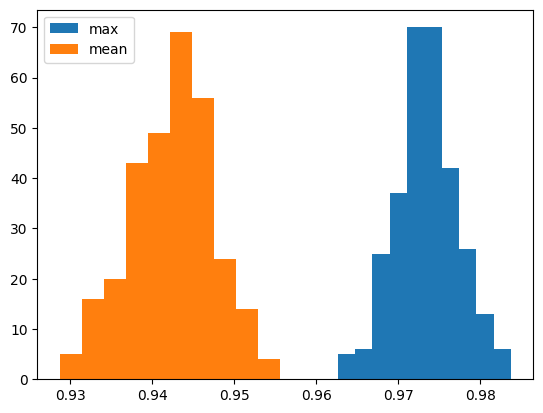

In [39]:
plt.hist(max_similarities, label = "max")
plt.hist(mean_similarities, label = "mean")
plt.legend(loc="upper left")

Found 13 sets with max similarity > 0.98

Set 200 (max similarity: 0.984)


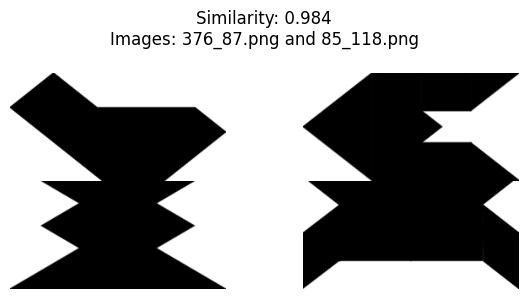


Set 62 (max similarity: 0.983)


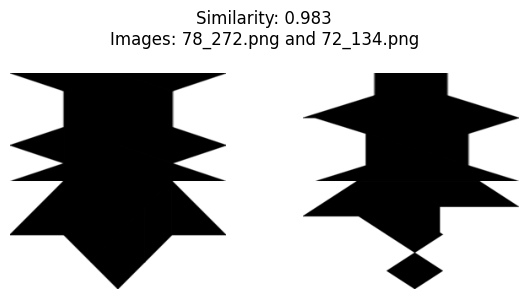


Set 131 (max similarity: 0.983)


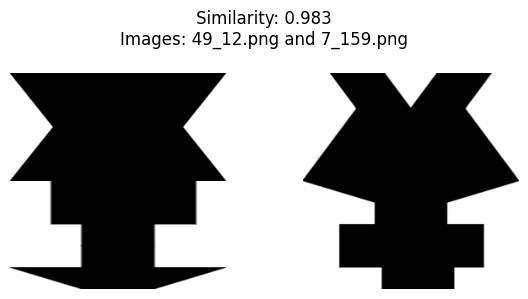


Set 126 (max similarity: 0.982)


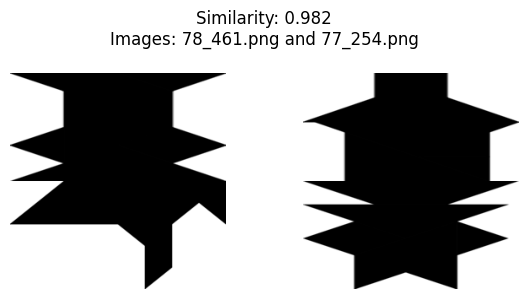


Set 132 (max similarity: 0.982)


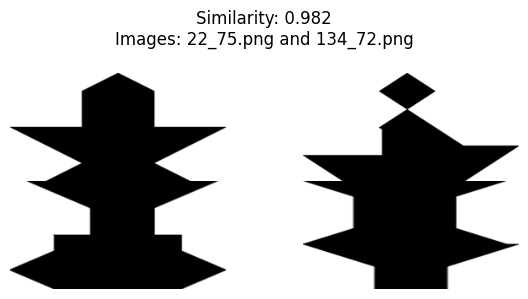


Set 5 (max similarity: 0.982)


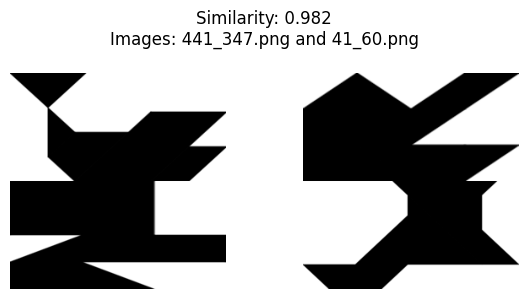


Set 103 (max similarity: 0.981)


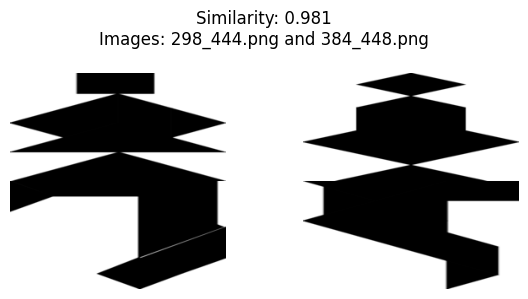


Set 209 (max similarity: 0.981)


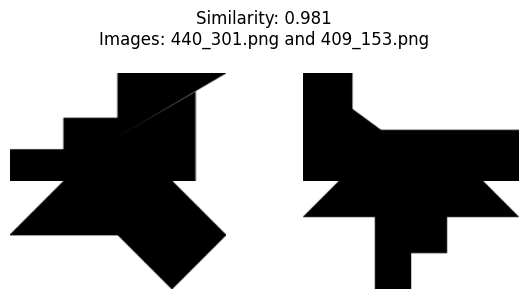


Set 191 (max similarity: 0.980)


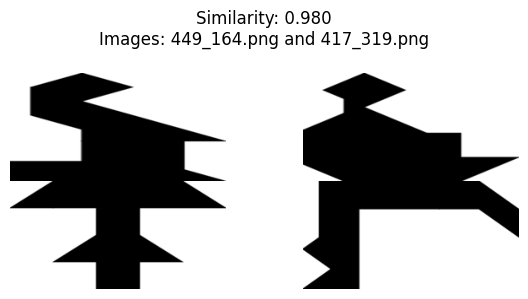


Set 260 (max similarity: 0.980)


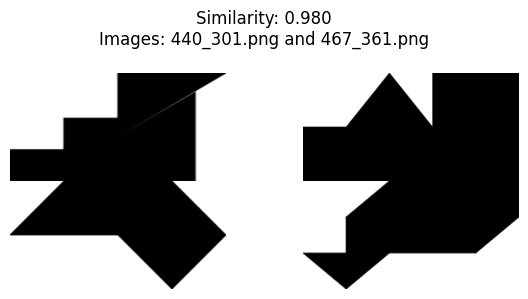


Set 229 (max similarity: 0.980)


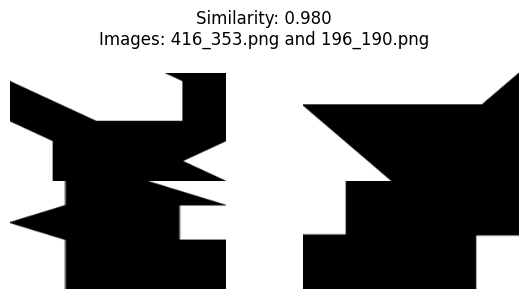


Set 86 (max similarity: 0.980)


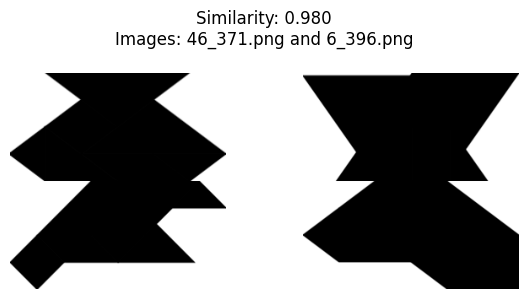


Set 52 (max similarity: 0.980)


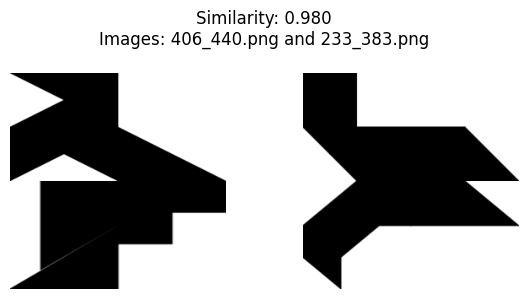

In [41]:
# Find sets with high similarities
high_sim_sets = []
threshold = 0.98  # or whatever threshold you want

# Find and sort high similarity sets
for set_id, image_set in manager_noncomp.sets.items():
    stats = image_set.get_summary_stats()
    if stats['max_similarity'] > threshold:
        high_sim_sets.append((set_id, stats['max_similarity']))

high_sim_sets.sort(key=lambda x: x[1], reverse=True)

print(f"Found {len(high_sim_sets)} sets with max similarity > {threshold}")

# Look at each set's most similar pairs
for set_id, max_sim in high_sim_sets:
    print(f"\nSet {set_id} (max similarity: {max_sim:.3f})")
    manager_noncomp.sets[set_id].display_ranked_pairs(n_pairs=1)